# Predict house price using regression

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline 

In [4]:
ds = pd.read_csv("input/kc_house_data.csv")
ds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
ds.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
ds.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
ds = ds.drop(['id', 'date'], axis = 1)

# Price distribution

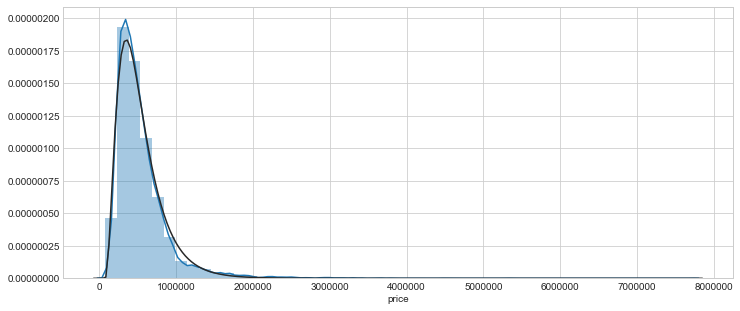

In [8]:
f, ax = plt.subplots(figsize=(12,5))
sns.distplot(ds.price, ax = ax, fit = stats.gausshyper)
plt.show()

As we can see the price distribution is skewed to the right (Positive Skew). 

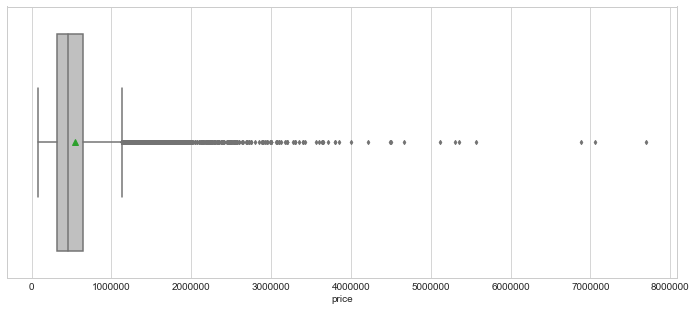

Min: 75000.0
1 Q: 321950.0
Median:450000.0
3 Q: 645000.0
Max: 7700000.0


In [9]:
f, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = 'price', data = ds, ax=ax, showmeans=True, fliersize=3, orient="h", color = "silver")
plt.show()

print('Min: ' + str(ds['price'].min()))
print('1 Q: ' + str(np.percentile(ds['price'], 25)))
print('Median:' + str(ds.price.median()))
print('3 Q: ' + str(np.percentile(ds['price'], 75)))
print('Max: ' + str(ds['price'].max()))

The boxplot above shows us that there are many outliers. There are few prices above 500.000.  

In [10]:
# add a new variable to analyse if the house is renovated
ds['is_renovated'] = ds['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

0    20699
1      914
Name: is_renovated, dtype: int64


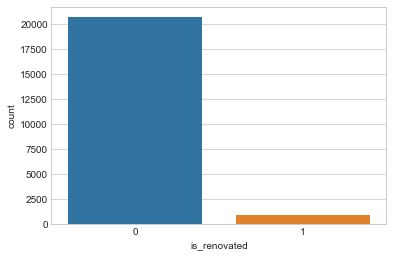

In [11]:
sns.countplot(x = ds.is_renovated, data = ds)
print(ds['is_renovated'].value_counts())

As we can see there are many houses that were sold without a renewed.
Lets see the correlation among variables to have an idea regarding the impact of each variable on house price.

# Correlation coefficient

In [12]:
# Continous and Categorical variables
# To biserial variables (i.e. is_renovated and waterfront) we could use stats.biserial (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html)
ds.drop(['view','grade','floors','bedrooms','bathrooms','condition'], axis = 1).corr(method = 'pearson')

,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
price,1.000000,0.702035,0.089661,0.266369,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.126092
sqft_living,0.702035,1.000000,0.172826,0.103818,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.055094
sqft_lot,0.089661,0.172826,1.000000,0.021604,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.007745
waterfront,0.266369,0.103818,0.021604,1.000000,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.093294
sqft_above,0.605567,0.876597,0.183512,0.072075,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050,0.023178
sqft_basement,0.323816,0.435043,0.015286,0.080588,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276,0.070963
yr_built,0.054012,0.318049,0.053080,-0.026161,0.423898,-0.133124,1.000000,-0.224874,-0.346869,-0.148122,0.409356,0.326229,0.070958,-0.225195
yr_renovated,0.126434,0.055363,0.007644,0.092885,0.023285,0.071323,-0.224874,1.000000,0.064357,0.029398,-0.068372,-0.002673,0.007854,0.999968
zipcode,-0.053203,-0.199430,-0.129574,0.030285,-0.261190,0.074845,-0.346869,0.064357,1.000000,0.267048,-0.564072,-0.279033,-0.147221,0.064335
lat,0.307003,0.052529,-0.085683,-0.014274,-0.000816,0.110538,-0.148122,0.029398,0.267048,1.000000,-0.135512,0.048858,-0.086419,0.029350


We can see that the variables 'sqft_living', 'sqft_above' and 'sqft_living15' have a significant positive relationship with price.

In [13]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Below we have plots to show us the relationship among continuous variables that have at least correlation coefficient higher than 0.3 with price.

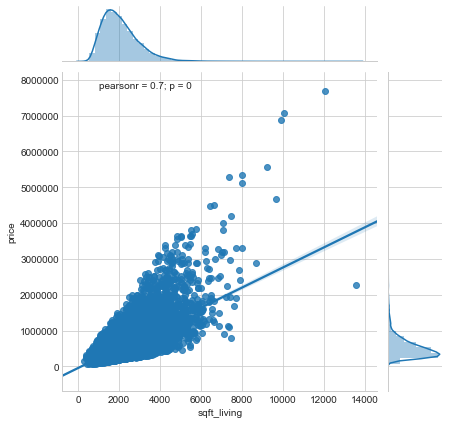

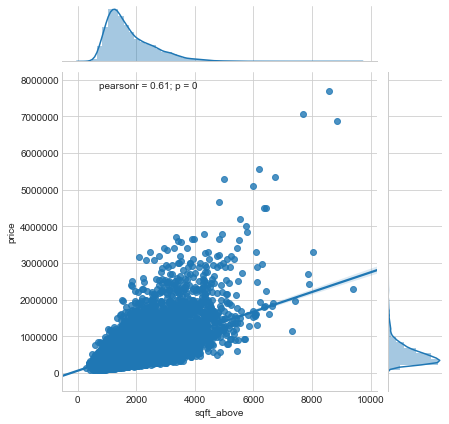

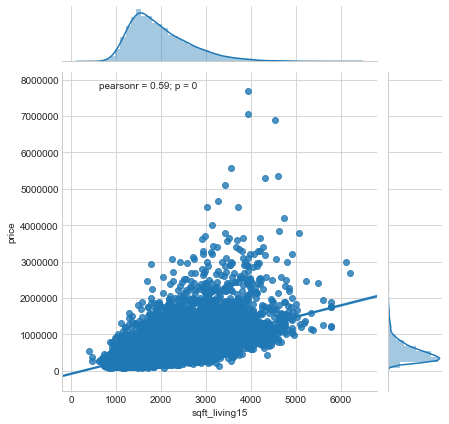

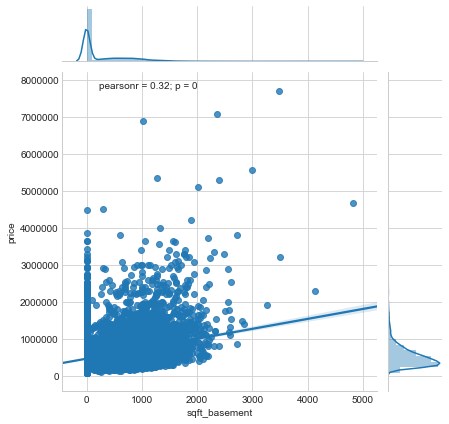

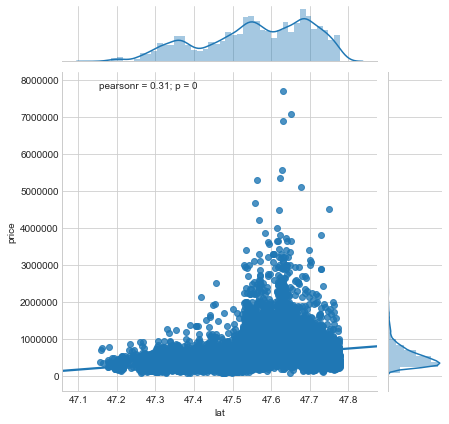

In [14]:
sns.jointplot(x = 'sqft_living', y = 'price', data = ds, kind = 'reg')
sns.jointplot(x = 'sqft_above', y = 'price', data = ds, kind = 'reg')
sns.jointplot(x = 'sqft_living15', y = 'price', data = ds, kind = 'reg')
sns.jointplot(x = 'sqft_basement', y = 'price', data = ds, kind = 'reg')
sns.jointplot(x = 'lat', y = 'price', data = ds, kind = 'reg')
plt.show()

We can see that there are a lot of zeros in the plot that show the relationship between price and sqlt_basement. Maybe we can create another biserial variable based on sqlt_basement.


# Biserial variables

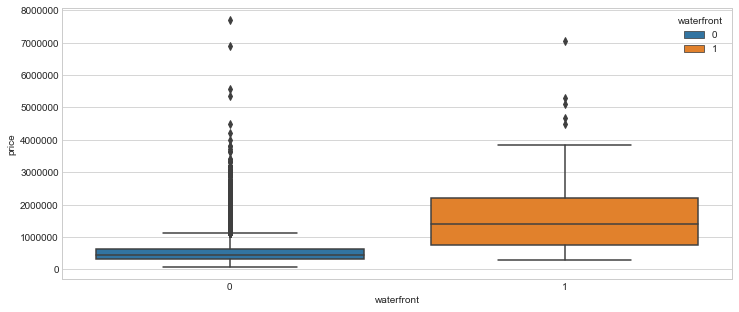

In [15]:
#Price by waterfront
f, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x="waterfront", y="price" , hue="waterfront", ax=ax, data=ds, dodge = False)
plt.show()

Looking at boxplot above, the price varies more when the house has waterfront.

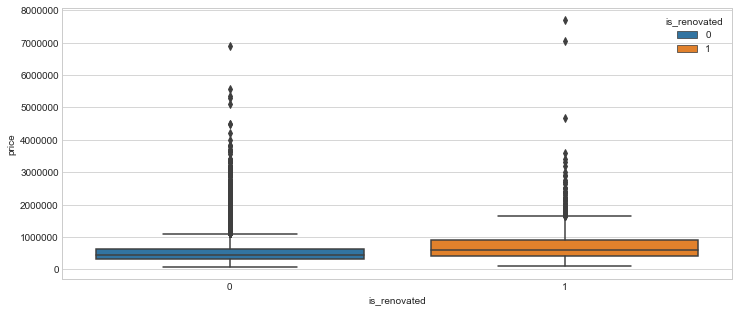

In [16]:
#Price by is_renovated
f, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x="is_renovated", y="price" , hue="is_renovated", ax=ax, data=ds, dodge = False)
plt.show()

In [17]:
#Ordinal variables
ds[['price','view','grade','floors','bedrooms','bathrooms','condition']].corr(method = 'spearman')

,price,view,grade,floors,bedrooms,bathrooms,condition
price,1.000000,0.293931,0.658215,0.322347,0.344652,0.497160,0.018490
view,0.293931,1.000000,0.217044,0.019655,0.081421,0.155549,0.046000
grade,0.658215,0.217044,1.000000,0.501684,0.380534,0.658194,-0.167374
floors,0.322347,0.019655,0.501684,1.000000,0.227541,0.546800,-0.287915
bedrooms,0.344652,0.081421,0.380534,0.227541,1.000000,0.521406,0.012660
bathrooms,0.497160,0.155549,0.658194,0.546800,0.521406,1.000000,-0.162891
condition,0.018490,0.046000,-0.167374,-0.287915,0.012660,-0.162891,1.000000


Let's analyse the price by grade. As we can see above, grade has a significant relationship with price.

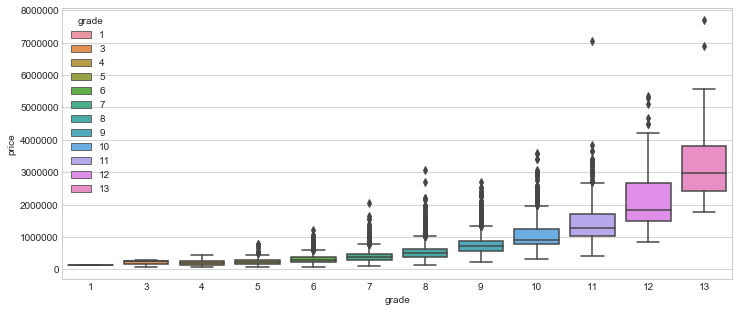

In [18]:
#Price by grade
f, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x="grade", y="price" , hue="grade", ax=ax, data=ds, dodge = False);
plt.show()

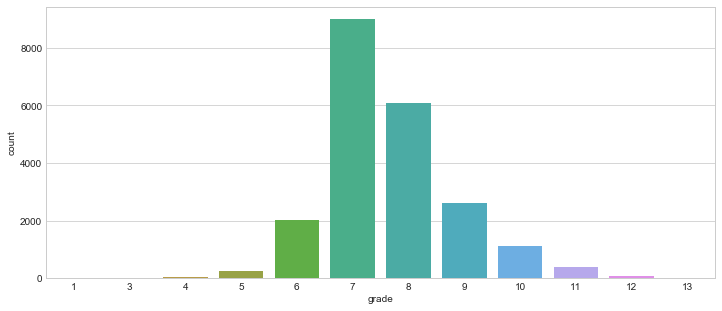

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: grade, dtype: int64

In [19]:
f, ax = plt.subplots(figsize=(12,5))
sns.countplot(x = ds.grade, data = ds)
plt.show()
ds.groupby(["grade"])["grade"].count()


Let's see the value accumulated by grade.

In [20]:
ds[['grade', 'price']].groupby('grade')['price'].sum().map('{:,.2f}'.format)

grade
1           142,000.00
3           617,000.00
4         6,217,050.00
5        60,142,801.00
6       615,312,221.00
7     3,615,663,146.00
8     3,294,030,582.00
9     2,022,736,981.00
10    1,215,388,398.00
11      597,239,849.00
12      197,209,980.00
13       48,225,000.00
Name: price, dtype: object

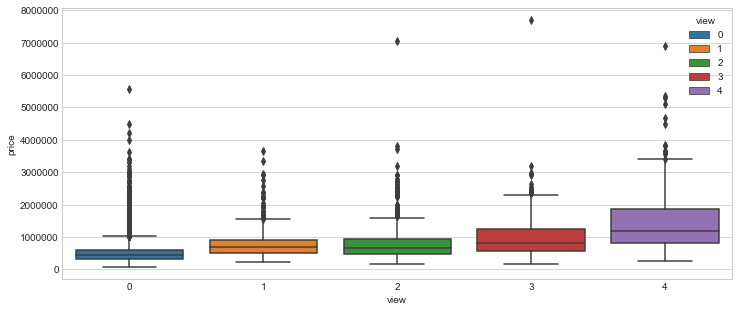

In [21]:
#Price by view
f, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x="view", y="price" , hue="view", ax=ax, data=ds, dodge = False);
plt.show()

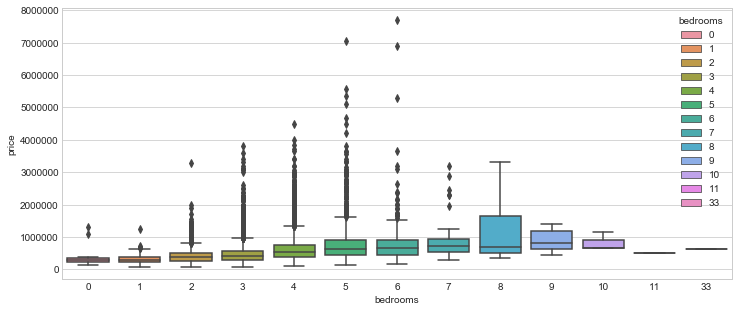

In [22]:
#Price by bedrooms
f, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x="bedrooms", y="price" , hue="bedrooms", ax=ax, data=ds, dodge = False);
plt.show()

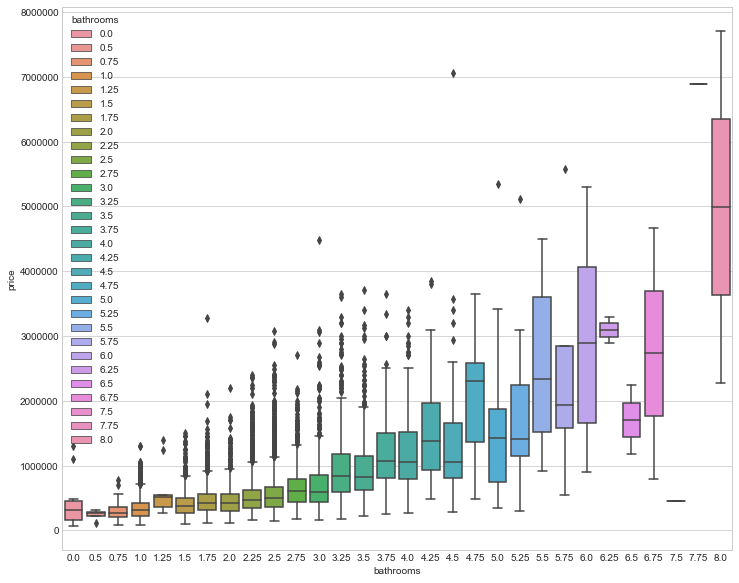

In [23]:
#Price by bathrooms
f, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x="bathrooms", y="price" , hue="bathrooms", ax=ax, data=ds, dodge = False)
plt.show()

# Linear Regression - Model Version 1

In [24]:
#Define X and Y
x = ds.drop(['price'], axis = 1)
y = ds['price'].values

#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

#create linear model
model_1 = linear_model.LinearRegression()

#train model
model_1_fit = model_1.fit(x_train, y_train)

#evaluating error
mean_squared_error(model_1_fit.predict(x_test), y_test)

37106517233.41149

# Linear Regression - Model Version 2
### Apply MinMaxScaler

In [25]:
#Define X and Y
x = ds.drop(['price'], axis = 1)
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)
y = ds['price'].values

#Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

#create Linear Model
model_2 = linear_model.LinearRegression()

#train model
model_2_fit = model_2.fit(x_train, y_train)

#evaluating error
mean_squared_error(model_2_fit.predict(x_test), y_test)

39442966994.67277

# Random Forest Regressor - Model Version 1

In [26]:
#Define x and y
x = ds.drop(['price'], axis = 1)
y = ds['price'].values

#Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

#train
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

#evaluating error
mean_squared_error(rf.predict(x_test), y_test)

20175590156.84688

In [27]:
#Feature importance 
sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), ds.drop(['price'], axis = 1).columns), reverse=True)

[(0.3144, 'sqft_living'),
 (0.2856, 'grade'),
 (0.1575, 'lat'),
 (0.0622, 'long'),
 (0.0367, 'sqft_living15'),
 (0.0328, 'waterfront'),
 (0.023, 'yr_built'),
 (0.0178, 'sqft_above'),
 (0.0136, 'sqft_lot'),
 (0.0134, 'sqft_lot15'),
 (0.0114, 'zipcode'),
 (0.0105, 'view'),
 (0.0056, 'bathrooms'),
 (0.0052, 'sqft_basement'),
 (0.003, 'bedrooms'),
 (0.0028, 'condition'),
 (0.0021, 'floors'),
 (0.002, 'yr_renovated'),
 (0.0004, 'is_renovated')]

# Next steps:
* Try to add dummy variables to deal with  view, grade, condition and floors to increase Linear Model performance
* GridSearch to RandomForest
* Find a way (learn how) to deal with zipcode


Feel free to send me your thoughts or questions about this Kernel. It would be great.